In [1]:
#Ref: https://janakiev.com/notebooks/keras-iris/

In [2]:
%matplotlib inline

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [4]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import TensorBoard
import time

Using TensorFlow backend.


In [5]:
iris = load_iris()
X = iris['data']
y = iris['target']
names = iris['target_names']
feature_names = iris['feature_names']
Y = OneHotEncoder().fit_transform(y[:, np.newaxis]).toarray()
X_scaled = StandardScaler().fit_transform(X)
# Split the data set into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.5, random_state=914)
n_features = X.shape[1]
n_classes = Y.shape[1]
print(n_features)
print(n_classes)

4
3


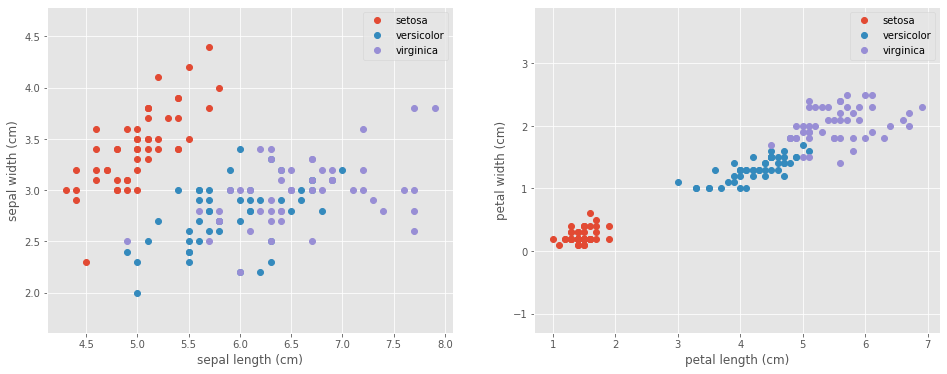

In [6]:
# Visualize the data sets
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
for target, target_name in enumerate(names):
    X_plot = X[y == target]
    plt.plot(X_plot[:, 0], X_plot[:, 1], linestyle='none', marker='o', label=target_name)
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.axis('equal')
plt.legend();

plt.subplot(1, 2, 2)
for target, target_name in enumerate(names):
    X_plot = X[y == target]
    plt.plot(X_plot[:, 2], X_plot[:, 3], linestyle='none', marker='o', label=target_name)
plt.xlabel(feature_names[2])
plt.ylabel(feature_names[3])
plt.axis('equal')
plt.legend();

In [7]:
# In order to ignore FutureWarning
def create_custom_model(input_dim, output_dim, nodes, n=1, name='model'):
    def create_model():
        # Create model
        model = Sequential(name=name)
        for i in range(n):
            model.add(Dense(nodes, input_dim=input_dim, activation='sigmoid'))
        model.add(Dense(output_dim, activation='softmax'))

        # Compile model
        model.compile(loss='mean_squared_error', 
                      optimizer='adam', 
                      metrics=['accuracy'])
        return model
    return create_model

models = [create_custom_model(n_features, n_classes, 10, i, 'model_{}'.format(i)) for i in range(1, 3)]
for create_model in models:
    create_model().summary()





_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                50        
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 33        
Total params: 83
Trainable params: 83
Non-trainable params: 0
_________________________________________________________________
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 10)                50        
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 33        
Total params: 193
Trainable params: 193
Non-trainable params: 0
____________

In [8]:
from keras.callbacks import TensorBoard
import time
history_dict = {}
cb = TensorBoard()

for create_model in models:
    model = create_model()
    print('Model name:', model.name)
    c_time = time.time()
    history_callback = model.fit(X_train, Y_train,
                                 batch_size=5,
                                 epochs=200,
                                 verbose=0,
                                 validation_data=(X_test, Y_test),
                                 callbacks=[cb])
    score = model.evaluate(X_test, Y_test, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    print('Time difference:', time.time()-c_time)
    history_dict[model.name] = history_callback

model_cus = Sequential(name = "Custom")
model_cus.add(Dense(9, input_dim = n_features, activation = 'sigmoid'))
model_cus.add(Dense(10, input_dim = n_features, activation = 'sigmoid'))
model_cus.add(Dense(n_classes, activation = "softmax"))
model_cus.compile(loss='mean_squared_error', 
                      optimizer='adam', 
                      metrics=['accuracy'])
print('Model name:', model_cus.name)
history_callback = model_cus.fit(X_train, Y_train,
                                 batch_size=5,
                                 epochs=50,
                                 verbose=0,
                                 validation_data=(X_test, Y_test),
                                 callbacks=[cb])
score = model_cus.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print('Time difference:', time.time()-c_time)
history_dict[model_cus.name] = history_callback

Model name: model_1











Test loss: 0.03462268600861231
Test accuracy: 0.9733333333333334
Time difference: 9.55410623550415
Model name: model_2
Test loss: 0.0241367157548666
Test accuracy: 0.96
Time difference: 10.204777956008911
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 9)                 45        
_________________________________________________________________
dense_12 (Dense)             (None, 10)                100       
_________________________________________________________________
dense_13 (Dense)             (None, 3)                 33        
Total params: 178
Trainable params: 178
Non-trainable params: 0
_________________________________________________________________
Model name: Custom
Test loss: 0.1256230229139328
Test accuracy: 0.6933333317438761
Time difference: 14.287741899490356


In [13]:
model_cus.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 9)                 45        
_________________________________________________________________
dense_12 (Dense)             (None, 10)                100       
_________________________________________________________________
dense_13 (Dense)             (None, 3)                 33        
Total params: 178
Trainable params: 178
Non-trainable params: 0
_________________________________________________________________


In [9]:
history_dict

{'model_1': <keras.callbacks.History at 0x1a4650d510>,
 'model_2': <keras.callbacks.History at 0x1a479d7f10>,
 'Custom': <keras.callbacks.History at 0x1a47ab7f10>}

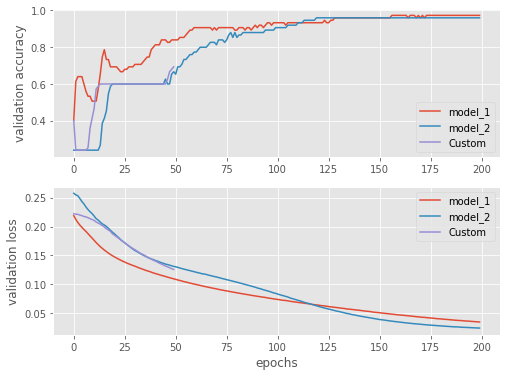

In [10]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 6))

for model_name in history_dict:
    val_acc = history_dict[model_name].history['val_acc']
    val_loss = history_dict[model_name].history['val_loss']
    ax1.plot(val_acc, label=model_name)
    ax2.plot(val_loss, label=model_name)
    
ax1.set_ylabel('validation accuracy')
ax2.set_ylabel('validation loss')
ax2.set_xlabel('epochs')
ax1.legend()
ax2.legend()
plt.show()

In [11]:
from sklearn import datasets
import numpy as np
import time

current_time = time.time()
np.random.seed(914)

#x is z from previous layers
def sigmoid(x):
    return 1/(1+np.exp(-x))
def relu(x):
    return np.where(x<0,0,x)
#array of predict and array of target
def mean_sqared_error(predict, target):
    return np.sum(np.square(predict - target), axis = 0)
#array of exp(z)
def softmax(x):
    return np.exp(x)/np.sum(np.exp(x), axis =0)

#Loading the dataset
iris = datasets.load_iris()
#ndarrays, data has 4 attributes, target has 3 labels
original_data = iris.data[0:60]
#Adding bias term
data = np.insert(original_data, 4, 1, axis= 1)
original_target = iris.target[0:60]
target = np.array([np.where(original_target ==0,1,0), np.where(original_target ==1,1,0), np.where(original_target ==2,1,0)])

#There are 5 layers. Input layer 10 nodes, h1 10 nodes, h2 10 nodes, h3 10 nodes, output 3 nodes. Matching dimensions for cannon's algorithm
#Test loss: 0.04626183790465196, Test accuracy: 0.9333333333333333, Time difference: 5.915765047073364

#Initialize the weights (nodes, weights)
#input-h1
w01 = np.random.rand(9, 5)/2
#h1-h2
w12 = np.random.rand(10,10)/2
#h2-ouput
w2o = np.random.rand(3, 11)/2

'''
#input-h1
w01 = np.random.rand(9, 5)/2
#h1-h2
w12 = np.random.rand(10,10)/2
#h2-ouput
w2o = np.random.rand(3, 11)/2
'''

#Learning rate
lr = 0.01
all_loss = []
for i in range(200):
    #Forward propogation
    layer01 = np.dot(w01, np.transpose(data))
    h1 = sigmoid(layer01)#9*5 dot 5*150 = 9 *150
    h1 = np.vstack((h1, np.ones(h1.shape[1])))
    layer12 = np.dot(w12, h1)#10*10 dot 10*150 =10*150
    h2 = sigmoid(layer12)
    h2 = np.vstack((h2, np.ones(h2.shape[1])))
    layer2o = np.dot(w2o, h2) #3*11 dot 11*150 = 3*150
    output = sigmoid(layer2o)
    loss = np.sum(np.square(output - target))
    all_loss.append(loss)

    #backward (minus delta)
    batch_size = 80
    delta_w2o = np.dot(((output - target) * ((-np.exp(-layer2o)*output)/np.square(1-np.exp(-layer2o)))), np.transpose(h2))/batch_size
    #delta_w12
    delta_w12 =np.dot(np.transpose(w2o), ((output - target) * ((-np.exp(-layer2o)*output)/np.square(1-np.exp(-layer2o)))))
    #delete the one row that doesn't come from calculation
    delta_w12 = delta_w12[0:10,:]
    intermediate = delta_w12 * ((-np.exp(-layer12)*sigmoid(layer12))/np.square(1-np.exp(-layer12)))
    delta_w12 = np.dot(intermediate, np.transpose(h1))/batch_size
    #delta_w01
    delta_w01 =np.dot(np.transpose(w12), intermediate)
    delta_w01 = delta_w01[0:9,:]
    delta_w01 = np.dot(delta_w01 * ((-np.exp(-layer01)*sigmoid(layer01))/np.square(1-np.exp(-layer01))), data)/batch_size
    #Weight updating
    w2o = w2o + lr*delta_w2o
    w12 = w12 +lr*delta_w12
    w01 = w01 + lr*delta_w01

print("accuracy is", np.sum(np.argmax(output, axis = 0) ==np.argmax(target, axis = 0))/60)
print("Time difference is", time.time() -current_time, "seconds")

accuracy is 0.8333333333333334
Time difference is 0.05460190773010254 seconds


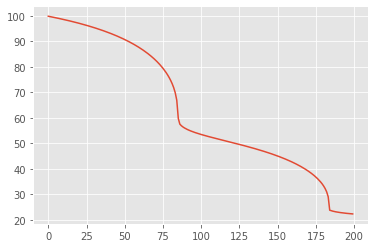

In [12]:
plt.plot([i for i in range(200)], all_loss)